# Wholesale Customers Analysis

## Problem Statement 1:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Load the necessary libraries and load the Dataset:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.stats.api as sm
import math
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [2]:
Wholesale_Data = pd.read_csv('Wholesale+Customers+Data.csv')

### Exploratory Data Analysis: -

In [3]:
Wholesale_Data.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [4]:
Wholesale_Data.tail(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
430,431,Hotel,Other,3097,4230,16483,575,241,2080
431,432,Hotel,Other,8533,5506,5160,13486,1377,1498
432,433,Hotel,Other,21117,1162,4754,269,1328,395
433,434,Hotel,Other,1982,3218,1493,1541,356,1449
434,435,Hotel,Other,16731,3922,7994,688,2371,838
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
Wholesale_Data.shape #the dimension(number of rows and columns) of the dataset.

(440, 9)

In [6]:
print('The total number of elements in the Wholesale Customer Data is',Wholesale_Data.size)

The total number of elements in the Wholesale Customer Data is 3960


### Checking for Null-values: -

In [7]:
Wholesale_Data.info() # the information about all the variables of the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


The Dataset consists of 9 Variables 
- Channel and Region are categorical columns 
- Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen are integer data type.

In [8]:
Wholesale_Data.isnull().values.any()

False

In [9]:
Missing_values = Wholesale_Data.isnull().sum().sum()
Missing_values

0

In [10]:
Wholesale_Data['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [11]:
Wholesale_Data['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

### Descriptive Data Analysis: -

In [12]:
Wholesale_Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### Summary of the Dataset: -

- The Dataset consists of 2 categorical variables and 6 continuous variables
- The Categorical variables are - 'Channel' and 'Region'
- The Continuous variables are -'Fresh', 'Milk', 'Frozen', 'Grocery', 'Detergents_Paper', 'Delicatessen'
- There are 3 unique values in region column in which 'other' has the most entries.
- There are 2 unique values in Channel Column in which 'Hotel' has more entries. 
- For all the 6 items, their standard deviation Is more than the mean. 
- All the 6 items have significant number of outliers which can be observed based on maximum and 75% Quartile value. 

#### Continuous Variables summary

#### 1>  Fresh

- Mean : 12000.29
- Standard Deviation : 12647.32
- Minimum value : 3.0
- Maximum Vakue : 112151
- Range : Max - Min = 112151 - 3 = 112148
- 1st Quartile (25%) : 3127.75	
- 2nd Quartile (50%) : 8504.0
- 3rd Quartile (75%) : 16933.75	
- IQR = Q3 - Q1 = 16933.75 - 3127.75 = 13806.25

#### 2>  Milk

- Mean : 5796.26
- Standard Deviation : 7380.37
- Minimum value : 55.0
- Maximum Vakue : 73498.0
- Range : Max - Min = 73498.0 - 55.0 = 73443.0
- 1st Quartile (25%) : 1533.0	
- 2nd Quartile (50%) : 3627.0
- 3rd Quartile (75%) : 7190.25	
- IQR = Q3 - Q1 = 7190.25 - 1533.0 = 5657.25

#### 3>  Grocery

- Mean : 7951.27
- Standard Deviation : 9503.16
- Minimum value : 3.0
- Maximum Vakue : 92780.0
- Range : Max - Min = 92780.0 -3.0 = 92777
- 1st Quartile (25%) : 2153.0	
- 2nd Quartile (50%) : 4755.5
- 3rd Quartile (75%) : 10655.75		
- IQR = Q3 - Q1 = 10655.75 - 2153.0 = 8502.75

#### 4>  Frozen

- Mean : 3071.93
- Standard Deviation : 4854.67
- Minimum value : 25.0
- Maximum Vakue : 60869.0
- Range : Max - Min = 60869.0 - 25.0 = 60844
- 1st Quartile (25%) : 742.25	
- 2nd Quartile (50%) : 1526.0
- 3rd Quartile (75%) : 3554.25		
- IQR = Q3 - Q1 = 3554.25 - 742.25 = 2812.0

#### 5>  Detergents_Paper

- Mean : 2881.49
- Standard Deviation : 4767.85
- Minimum value : 3.0	
- Maximum Vakue : 40827.0
- Range : Max - Min = 40827.0 - 3.0 = 40824.0
- 1st Quartile (25%) : 256.75		
- 2nd Quartile (50%) : 816.5	
- 3rd Quartile (75%) : 3922.0		
- IQR = Q3 - Q1 = 3922.0 - 256.75 = 3665.25

#### 6>  Delicatessen

- Mean : 1524.87
- Standard Deviation : 2820.10
- Minimum value : 3.0	
- Maximum Vakue : 47943.0
- Range : Max - Min = 47943.0 - 3.0 = 47940.0
- 1st Quartile (25%) : 408.25	
- 2nd Quartile (50%) : 965.5		
- 3rd Quartile (75%) : 1820.25		
- IQR = Q3 - Q1 = 1820.25 - 408.25 = 1412.0

### 1.1. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [13]:
df = Wholesale_Data.copy()

In [14]:
#creating a summation of all the products into a new column as "Spending"
df['Spending'] =Wholesale_Data['Fresh']+Wholesale_Data['Milk']+Wholesale_Data['Grocery']+Wholesale_Data['Frozen']+Wholesale_Data['Detergents_Paper']+Wholesale_Data['Delicatessen']
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [15]:
#Region and Channel which spent the most and least?
region_df = df.groupby('Region')['Spending'].sum()
print(region_df)
print()
channel_df = df.groupby('Channel')['Spending'].sum()
print(channel_df)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


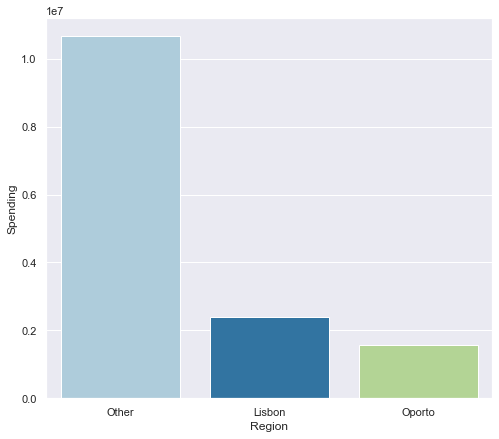

In [16]:
plt.figure(figsize=(8,7))
sns.set_palette("Paired", 9)
sns.barplot(x='Region',y='Spending', data=df, ci=None, estimator=np.sum);
plt.show()

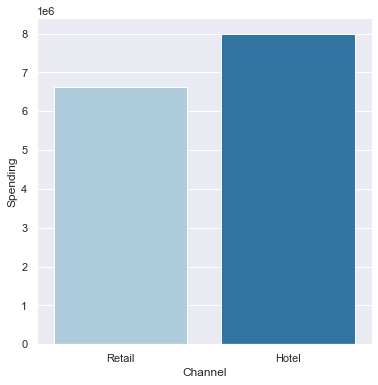

In [17]:
plt.figure(figsize=(6,6))
sns.set_palette("Paired", 9)
sns.barplot(x='Channel',y='Spending', data=df, ci=None, estimator=np.sum);
plt.show()

- Based on above Graphs, we can see that 'Hotel' channel gets the maximum expenditure and 'retail' channel get the minimum expenditure. 
- Also, as per region wise, 'other' region has maximum expenditure and 'Oporto' region has minimum expenditure.  

### -  Highest spend in the Region is from "Others (1,06,77,599)" and lowest spend in the region is from "Oporto (15,55,088)"
### - Highest spend in the Channel is from "Hotel (79,99,569)" and lowest spend in the Channel is from "Retail (66,19,931)"

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

### 1) Fresh

<Figure size 1080x360 with 0 Axes>

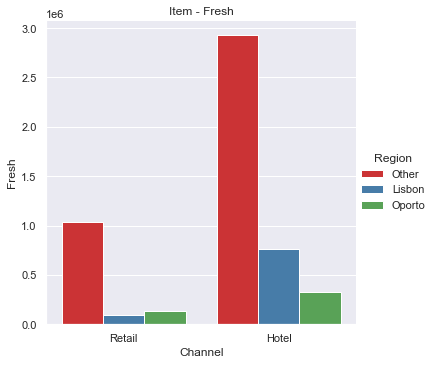

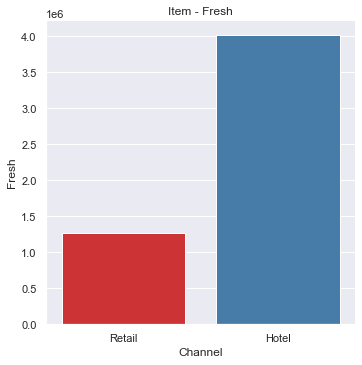

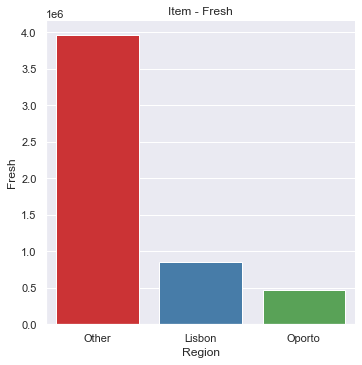

In [18]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum);

plt.title('Item - Fresh')

sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum);
plt.title('Item - Fresh')

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum);
plt.title('Item - Fresh')
plt.show()

As per the plots, we can see that:  
- In ‘Retail’ channel, Fresh item is most sold in ‘Other’ region followed by the ‘Oporto’ and then by the ‘Lisbon’ region.
- In ‘Hotel’ channel, Fresh item is most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’ region.
- Across all the 3 regions, Fresh item is sold most in the ‘Hotel’ region compared to the ‘Retail’ region.


### 2) Milk

<Figure size 1080x360 with 0 Axes>

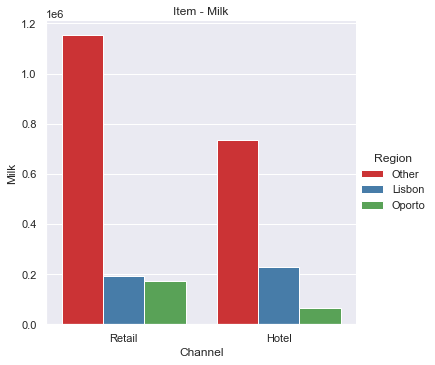

Text(0.5, 1.0, 'Item - Milk')

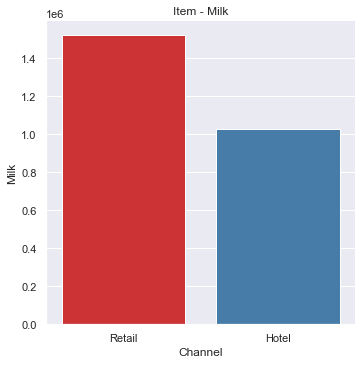

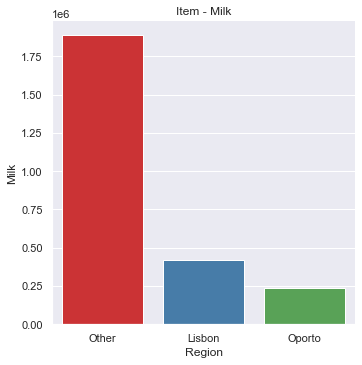

In [19]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Milk')
plt.show()

sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Milk')

sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Milk')

As per the plots, we can see that:  
- The Milk item is most sold in ‘Retail’ channel compared to the ‘Hotel’ channel.
- The milk item is most sold in ‘Other’ region followed up by the ‘Lisbon’ and ‘Oporto’ region.
- In ‘Retail’ channel, milk items are most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’.
- In ‘Hotel’ channel milk items are most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’.


### 3) Grocery

<Figure size 1080x360 with 0 Axes>

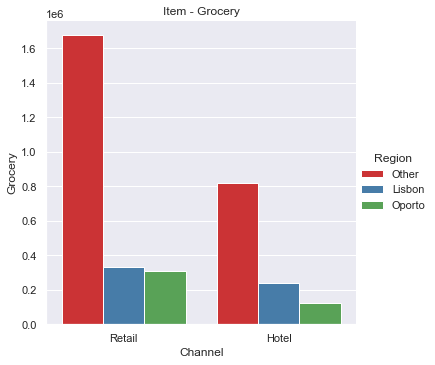

Text(0.5, 1.0, 'Item - Grocery')

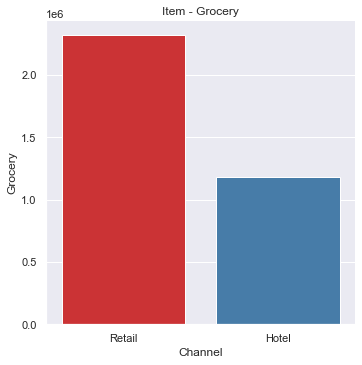

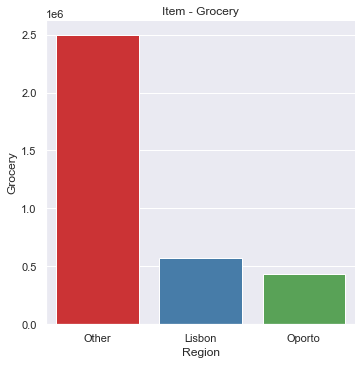

In [20]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Grocery')
plt.show()

sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Grocery')

sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Grocery')

As per the plots, we can see that:  
- The Grocery item is most sold in ‘Retail’ channel compared to the ‘Hotel’ channel.
- In all Regions, Grocery items are maximum sold in ‘other’ region followed by ‘Lisbon’ and ‘Oporto’ 


### 4) Frozen

<Figure size 1080x360 with 0 Axes>

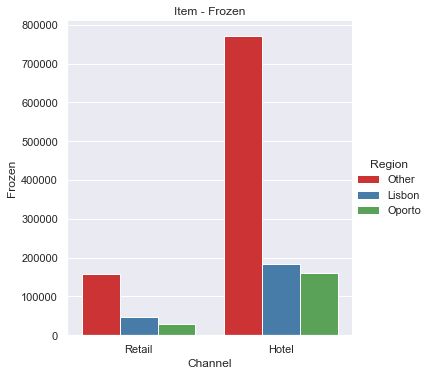

Text(0.5, 1.0, 'Item - Frozen')

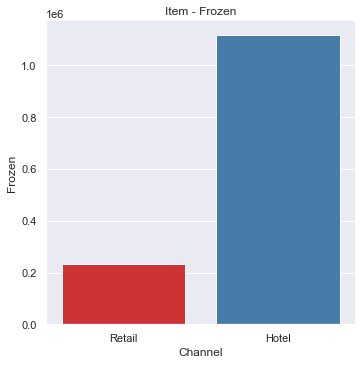

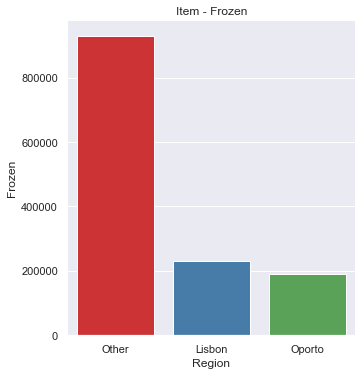

In [21]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Frozen')
plt.show()

sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Frozen')

sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Frozen')

As per the plots, we can see that:  
- The Frozen item is most sold in ‘Hotel’ channel compared to the ‘Retail’ channel.
- The Frozen item is most sold in ‘Other’ region followed up by the ‘Lisbon’ and ‘Oporto’ region.
- In both Channels, Frozen items are maximum sold in ‘other’ region followed by ‘Lisbon’ and ‘Oporto’ 


### 5) Detergents Paper

<Figure size 1080x360 with 0 Axes>

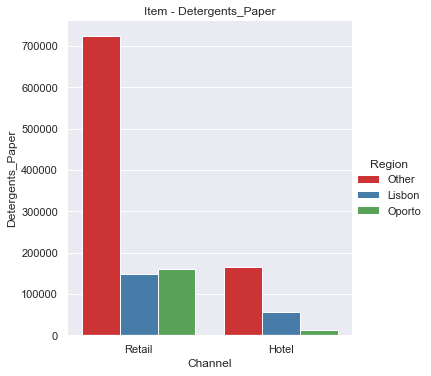

Text(0.5, 1.0, 'Item - Detergents_Paper')

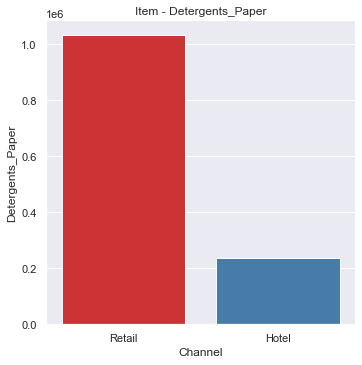

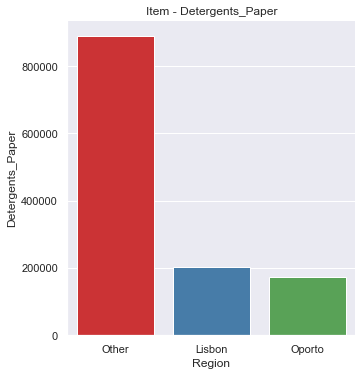

In [22]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Detergents_Paper')
plt.show()

sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Detergents_Paper')

As per the plots, we can see that:  
- The Detergents Paper item is most sold in ‘Retail’ channel compared to the ‘Hotel’ channel.
- The Detergents Paper item is most sold in ‘Other’ region followed up by the ‘Lisbon’ and ‘Oporto’ region.
- In ‘Retail’ channel, Detergents Paper items are most sold in ‘Other’ region followed by ‘Oporto’ and ‘Lisbon’.
- In ‘Hotel’ channel Detergents Paper items are most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’.


### 6) Delicatessen

<Figure size 1080x360 with 0 Axes>

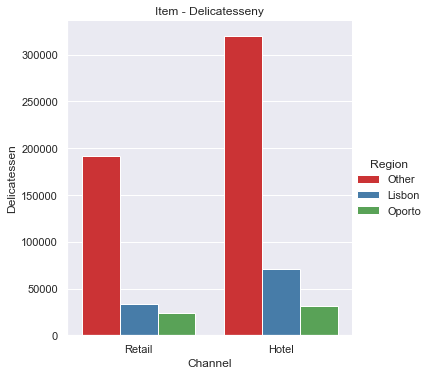

Text(0.5, 1.0, 'Item - Delicatessen')

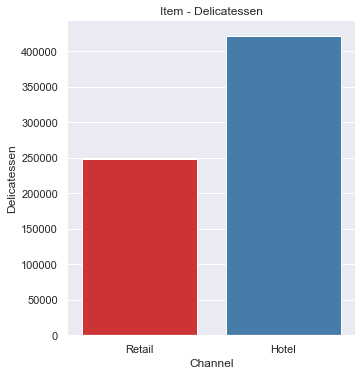

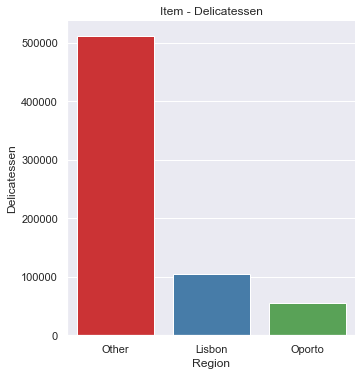

In [23]:
plt.figure(figsize=(15,5))
sns.set(color_codes=True)
sns.set_palette("Set1")
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Delicatesseny')
plt.show()

sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Delicatessen')

sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=Wholesale_Data, estimator= np.sum)
plt.title('Item - Delicatessen')

As per the plots, we can see that:  
- The Delicatessen   item is most sold in ‘Hotel’ channel compared to the ‘Retail’ channel.
- The Delicatessen item is most sold in ‘Other’ region followed up by the ‘Lisbon’ and ‘Oporto’ region.
- In ‘Retail’ channel, Delicatessen items are most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’.
- In ‘Hotel’ channel Delicatessen Paper items are most sold in ‘Other’ region followed by ‘Lisbon’ and ‘Oporto’.


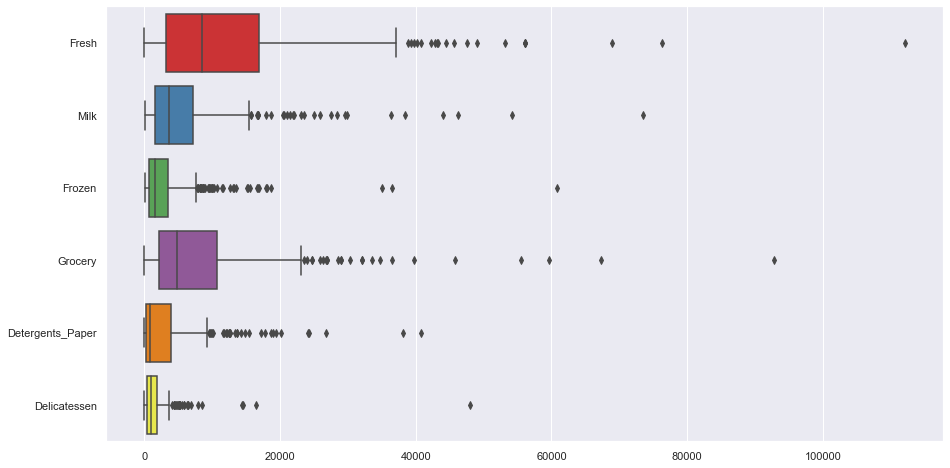

In [24]:
plt.figure(figsize= (15,8))
sns.set(color_codes=True)
sns.set_palette("Set1")

sns.boxplot(data = Wholesale_Data[['Fresh','Milk','Frozen','Grocery','Detergents_Paper','Delicatessen']], orient='h');

To check the spending across each item, let check from the boxplot,we see that the spending for 'Fresh' and 'Grocery' is the highest across Region and Channel and Delicatessen being the least spending. 

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

#### Descriptive measure of variability - coefficient of Variation 

In [25]:
mean = Wholesale_Data[['Fresh','Milk','Frozen','Grocery','Detergents_Paper','Delicatessen']].mean()
mean

Fresh               12000.297727
Milk                 5796.265909
Frozen               3071.931818
Grocery              7951.277273
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [26]:
std = Wholesale_Data[['Fresh','Milk','Frozen','Grocery','Detergents_Paper','Delicatessen']].std()
std

Fresh               12647.328865
Milk                 7380.377175
Frozen               4854.673333
Grocery              9503.162829
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [27]:
CV = std/mean
CV

Fresh               1.053918
Milk                1.273299
Frozen              1.580332
Grocery             1.195174
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

Lower the coefficient of Variation, higher is the consistency and vis vera.

- From the above output we can see that 'Fresh' items have least coefficient of variation and shows least inconsistent 
- 'Delicatessen' items have highest coefficient of Variation and shows the most inconsistent behavior.

#### Descriptive measure of variability - Standard Deviation 

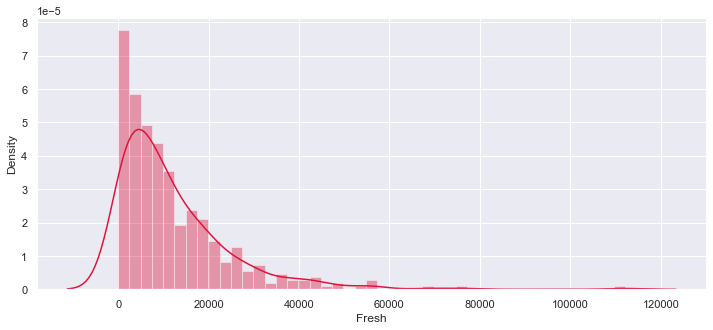

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Fresh'], bins= 45, hist=True, kde=True,color='crimson');

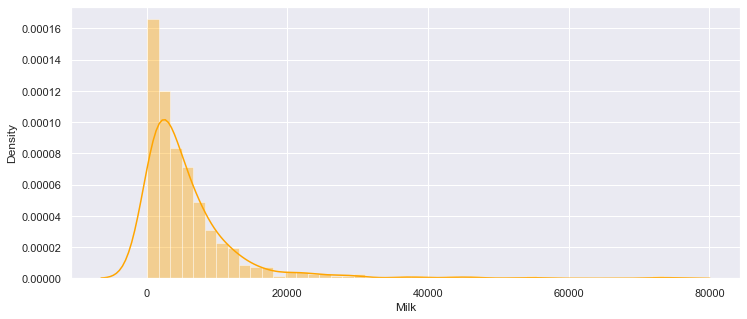

In [29]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Milk'], bins= 45, hist=True, kde=True,color='Orange');

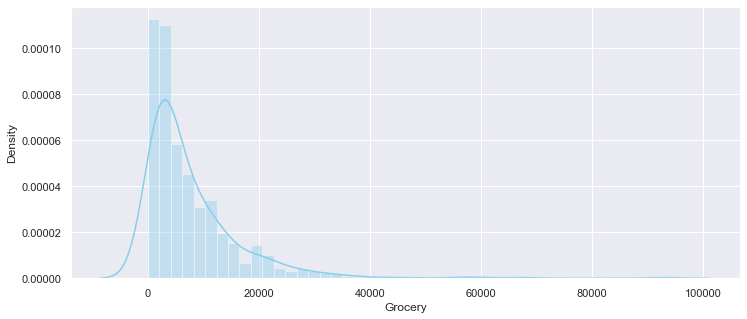

In [30]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Grocery'], bins= 45, hist=True, kde=True,color='skyblue');

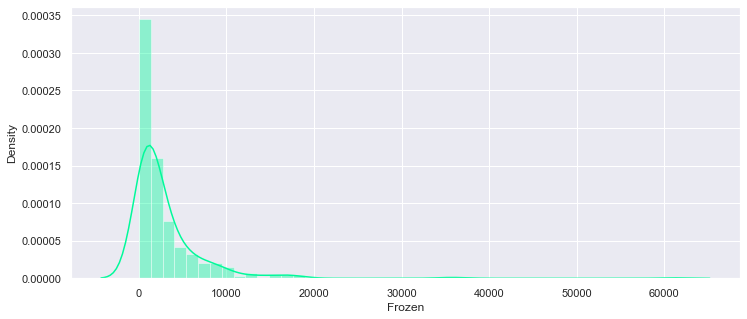

In [31]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Frozen'], bins= 45, hist=True, kde=True,color='mediumspringgreen');

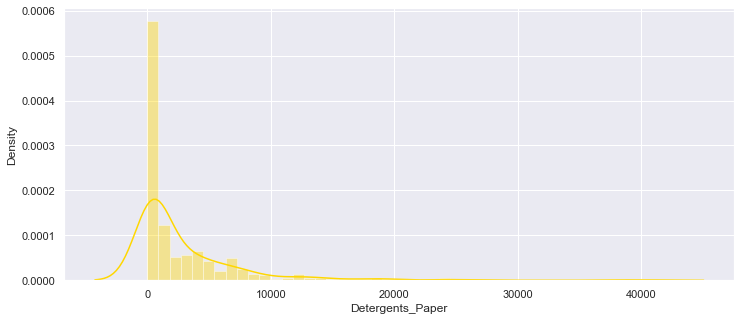

In [32]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Detergents_Paper'], bins= 45, hist=True, kde=True,color='gold');

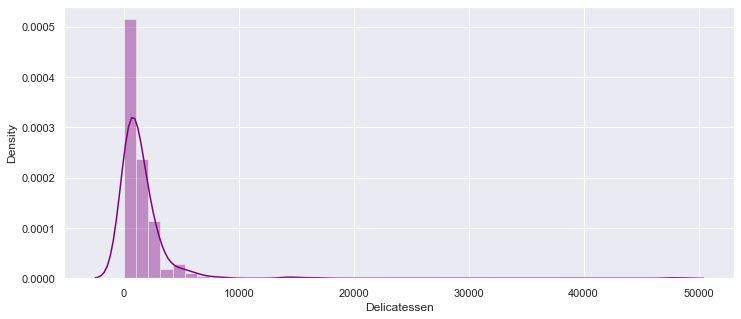

In [33]:
plt.figure(figsize=(12,5))
sns.distplot(Wholesale_Data['Delicatessen'], bins= 45, hist=True, kde=True,color='purple');

The histograms of the items we can show the same that the ‘Fresh’ items is the most widespread among the items and have the highest standard deviation and whereas 
‘Delicatessen’ items being less variable have the lowest standard deviation.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

Text(0, 0.5, 'Fresh')

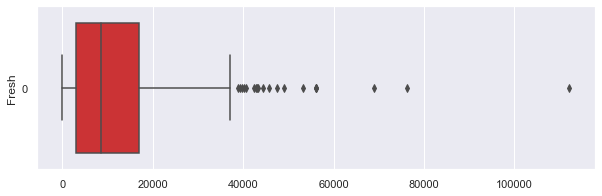

In [34]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)
sns.set_palette("Set1")

sns.boxplot(data = Wholesale_Data['Fresh'], orient='h');
plt.ylabel('Fresh')

Text(0, 0.5, 'Milk')

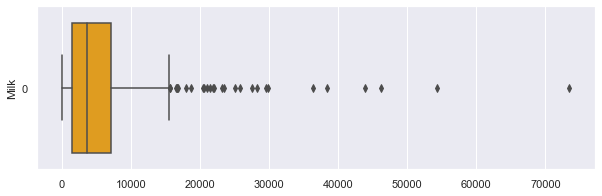

In [35]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)

sns.boxplot(data = Wholesale_Data['Milk'],color = "Orange",orient='h');
plt.ylabel('Milk')

Text(0, 0.5, 'Grocery')

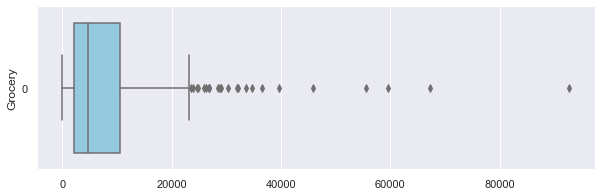

In [36]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)

sns.boxplot(data = Wholesale_Data['Grocery'],color = "skyblue",orient='h');
plt.ylabel('Grocery')

Text(0, 0.5, 'Frozen')

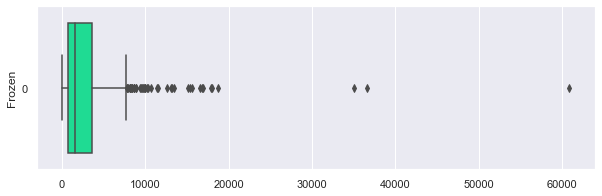

In [37]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)

sns.boxplot(data = Wholesale_Data['Frozen'],color = "mediumspringgreen",orient='h');
plt.ylabel('Frozen')

Text(0, 0.5, 'Detergents_Paper')

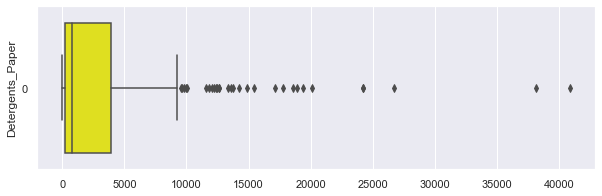

In [38]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)

sns.boxplot(data = Wholesale_Data['Detergents_Paper'],color = "Yellow",orient='h');
plt.ylabel('Detergents_Paper')

Text(0, 0.5, 'Delicatessen')

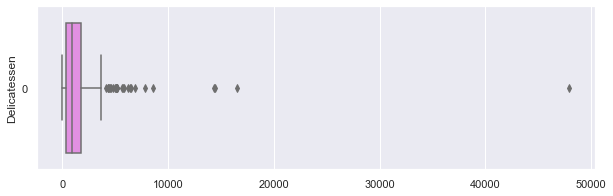

In [39]:
plt.figure(figsize= (10,3))
sns.set(color_codes=True)

sns.boxplot(data = Wholesale_Data['Delicatessen'],color = "violet",orient='h');
plt.ylabel('Delicatessen')

The box plots show that each of the item in the dataset has outliers in it.

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

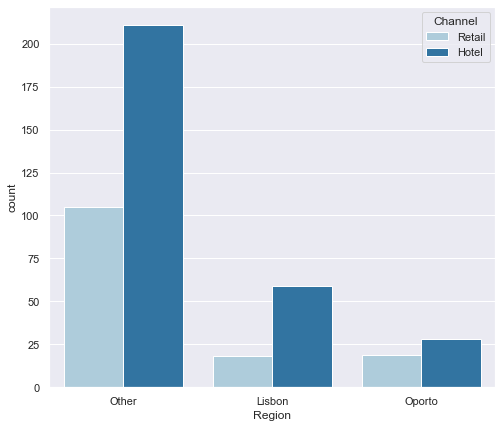

In [40]:
plt.figure(figsize=(8,7))
sns.set_palette("Paired", 9)
sns.countplot(x="Region", hue="Channel", data=Wholesale_Data);
plt.show()

### Business Recommendations:
- The Spending on 'Hotel' and 'Retail'are different,the spending of 'Hotel' channel is more than the 'Retail' channel which should be more or else equal, so the 'Retail' channel should be focused.
- From the above analysis and patterns, we can see that the most of the spending is from the'Fresh' item followed by the 'Grocery' item. The other items should be focused as well.
- Fresh items are more in demand in the 'Hotel' channel in 'Other' region.
- Grocery items are more in demand in Retail channel.
- Delicatessen and Detergent papers are in very less demand in all the regions, therefore expenditure for items should be given accordingly.
- We can also see from the above box plots that, all the items have many outliers, the total spendings are greater than mean spending. The outliers should be minimized.

## Problem Statement 2:

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [41]:
CMSU_Data = pd.read_csv('Survey-1.csv')

### Exploratory Data Analysis: -

In [42]:
CMSU_Data.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [43]:
CMSU_Data.tail(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
52,53,Female,21,Senior,Retailing/Marketing,Undecided,3.7,Part-Time,40.0,3,4,300,Laptop,700
53,54,Male,21,Junior,Retailing/Marketing,No,3.4,Part-Time,40.0,1,5,500,Laptop,300
54,55,Male,21,Senior,Other,Yes,3.4,Part-Time,50.0,1,4,250,Desktop,700
55,56,Female,21,Senior,Retailing/Marketing,No,3.1,Part-Time,50.0,1,1,300,Laptop,300
56,57,Female,21,Senior,International Business,Yes,3.4,Part-Time,42.0,1,1,200,Laptop,100
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [44]:
CMSU_Data.shape

(62, 14)

### Checking for Null-values: -

In [45]:
CMSU_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


Data has 14 variables in it
1. There are 6 categorical variables that are Gender, Class, major, Grad Intent, Employment and Computer.
2. There are 5 integer data type variables that are Age, Social Networking, Satisfaction, Spending and Text Messages.
3. There GPA and Salary are 2 float data type variables

### Descriptive Data Analysis: -

In [46]:
CMSU_Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [47]:
Gender_Major = pd.crosstab(CMSU_Data['Gender'],CMSU_Data['Major'],margins = False)
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2. Gender and Grad Intention

In [48]:
Gender_Grad_Intention = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['Grad Intention'], margins = False)
Gender_Grad_Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3. Gender and Employment

In [49]:
Gender_Employment = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['Employment'], margins = False)
Gender_Employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4. Gender and Computer

In [50]:
Gender_Computer = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['Computer'], margins = False)
Gender_Computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [51]:
Total_students = CMSU_Data['ID'].count()
Total_students

62

In [52]:
Male_students = CMSU_Data[CMSU_Data['Gender']=='Male']['Gender'].count()
Male_students

29

In [53]:
Female_students = CMSU_Data[CMSU_Data['Gender']=='Female']['Gender'].count()
Female_students

33

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [54]:
Probability_Male = Male_students/Total_students
Probability_Male

0.46774193548387094

### P(Male) = 0.468

### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [55]:
Probability_Female = Female_students/Total_students
Probability_Female

0.532258064516129

### P(Female) = 0.532

## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [56]:
#Using contingency tables of 2.1.1.Gender and Majors we got the total numbers of males and number of males opting for different majors
Gender_Major = pd.crosstab(CMSU_Data['Gender'],CMSU_Data['Major'],margins = False)
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [57]:
Probability_of_Males_opting_for_Accounting = 4/29
Probability_of_Males_opting_for_Accounting

0.13793103448275862

### P(Accounting| Male) = 0.138

In [58]:
Probability_of_Males_opting_for_CIS = 1/29
Probability_of_Males_opting_for_CIS

0.034482758620689655

### P(CIS| Male) = 0.034

In [59]:
Probability_of_Males_opting_for_Economics_Finance = 4/29
Probability_of_Males_opting_for_Economics_Finance

0.13793103448275862

### P(Economics/Finance| Male) = 0.138

In [60]:
Probability_of_Males_opting_for_InternationalBusiness = 2/29
Probability_of_Males_opting_for_InternationalBusiness

0.06896551724137931

### P(International Business| Male) = 0.069

In [61]:
Probability_of_Males_opting_for_Management = 6/29
Probability_of_Males_opting_for_Management

0.20689655172413793

### P(Management| Male) = 0.207

In [62]:
Probability_of_Males_opting_for_Other = 4/29
Probability_of_Males_opting_for_Other

0.13793103448275862

### P(Other| Male) = 0.138

In [63]:
Probability_of_Males_opting_for_Retailing_Marketing = 5/29
Probability_of_Males_opting_for_Retailing_Marketing 

0.1724137931034483

### P(Retailing/Marketing| Male) = 0.172

In [64]:
Probability_of_Males_of_Undecided = 3/29
Probability_of_Males_of_Undecided

0.10344827586206896

### P(Undecided| Male) = 0.103

## Inferences
- Probability of Males opting for Accounting is 13.79%
- Probability of Males opting for CIS. is 3.45%
- Probability of Males opting for Economics/Finance is 13.79%
- Probability of Males opting for InternationalBusiness is 6.90%
- Probability of Males opting for Management is 20.69%
- Probability of Males opting for Other is 13.79%
- Probability of Males opting for Retailing/Marketing is 17.24%
- Probability of Males of Undecided is 10.34%


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [65]:
Probability_of_Females_opting_for_Accounting = 3/Female_students
Probability_of_Females_opting_for_Accounting

0.09090909090909091

### P(Accounting| Female) = 0.090

In [66]:
Probability_of_Females_opting_for_CIS = 3/Female_students
Probability_of_Females_opting_for_CIS

0.09090909090909091

### P(CIS| Female) = 0.090

In [67]:
Probability_of_Females_opting_for_Economics_Finance = 7/Female_students
Probability_of_Females_opting_for_Economics_Finance

0.21212121212121213

### P(Economics/Finance| Female) = 0.212


In [68]:
Probability_of_Females_opting_for_InternationalBusiness = 4/Female_students
Probability_of_Females_opting_for_InternationalBusiness

0.12121212121212122

### P(International Business| Female) = 0.121

In [69]:
Probability_of_Females_opting_for_Management = 4/Female_students
Probability_of_Females_opting_for_Management

0.12121212121212122

### P(Management| Female) = 0.121

In [70]:
Probability_of_Females_opting_for_Other = 3/Female_students
Probability_of_Females_opting_for_Other

0.09090909090909091

### P(Other| Female) = 0.090

In [71]:
Probability_of_Females_opting_for_Retailing_Marketing = 9/Female_students
Probability_of_Females_opting_for_Retailing_Marketing

0.2727272727272727

### P(Retailing/Marketing| Female) = 0.273

In [72]:
Probability_of_Females_of_Undecided= 0/Female_students
Probability_of_Females_of_Undecided

0.0

### P(Undecided| Female) = 0.0


## Inferences
- Probability of Females opting for Accounting is 9.09%
- Probability of Females opting for CIS is 9.09%
- Probability of Females opting for Economics/Finance is 21.21%
- Probability of Females opting for InternationalBusiness is 12.12%
- Probability of Females opting for Management is 12.12%
- Probability of Females opting for Other is 9.09%
- Probability of Females opting for Retailing/Marketing is 27.27%
- Probability of Females of Undecided is 0.00%


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [73]:
#Using contingency tables of 2.1.2. Gender and Grad Intention we got the total numbers of males and number of males intends to be graduate
Gender_Grad_Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [74]:
Probability_of_Males_and_intends_to_be_graduate = 17/Total_students
Probability_of_Males_and_intends_to_be_graduate

0.27419354838709675

### P(Graduation Intent [Yes]| Male) = 0.274

#### - Probability of Males and intends to be Graduate is 27.4%


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 


In [75]:
#Using contingency tables of 2.1.4. Gender and Computer we got the total numbers of females and number of females does not have a laptop
Gender_Computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [76]:
Probability_of_randomly_selected_student_is_a_female_and_does_NOT_have_a_laptop = 4/Total_students
Probability_of_randomly_selected_student_is_a_female_and_does_NOT_have_a_laptop 

0.06451612903225806

### P(No Laptop | Female) = 0.0645

#### - Probability of Females and intends to be Graduate is 6.45%


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [77]:
#Using contingency tables of 2.1.3. Gender and Employment we got the total numbers of males and number of males who are full time employed
Gender_Employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [78]:
Probability_that_a_randomly_chosen_student_is_a_male_or_has_fulltime_employment = (10/62) + (29/62) - (7/62) 
Probability_that_a_randomly_chosen_student_is_a_male_or_has_fulltime_employment

0.5161290322580645

### P(Male U Full-Time Employment) = 0.516

### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [79]:
#Using contingency tables of 2.1.1. Gender and Major we got the total numbers of females and number of females majoring in international business or management.
Gender_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [80]:
Probability = (4/Female_students) + (4/Female_students)
Probability

0.24242424242424243

### P(International Business or Management| Female) = 0.242


## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [81]:
Gender_Grad_Intention.drop('Undecided', axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


#### P (Female ∩ Grad Intention) = P(Female) x P(Grad Intention)

In [82]:
Probability_of_Female = (9+11)/(9+11+3+17)
Probability_of_Female

0.5

In [83]:
Probability_Grad_Intention = (11+17)/(9+11+3+17) 
Probability_Grad_Intention

0.7

In [84]:
Probability_of_Female * Probability_Grad_Intention

0.35

In [85]:
Probability_Grad_Intention_Female = 11/(9+11+3+17)
Probability_Grad_Intention_Female

0.275

P(Female ∩ Grad intention) = P(Female) * P(Grad Intention) - Condition of Independent events
P(Female) = 20/40 = 0.5
P(Grad Intention) = 28/40 = 0.7
P(Female) * P(Grad Intention) = 0.35
P(Female ∩ Grad intention = 0.275

Graduate intention and being female are not independent events

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [86]:
#Using contingency tables of Gender and GPA we got the total numbers of students and number of students GPA less than 3
Gender_GPA = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['GPA']<3.0, margins = False)
Gender_GPA

GPA,False,True
Gender,,
Female,25,8
Male,20,9


In [87]:
Probability_that_his_or_her_GPA_is_less_than_3 = 17/Total_students
Probability_that_his_or_her_GPA_is_less_than_3 

0.27419354838709675

### P (GPA < 3.0) = 0.27

### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [88]:
#Using contingency tables of Gender and Salary we got the total numbers of Male and Female and number of male and female earning 50 or more
Gender_Salary = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['Salary'], margins = False)
Gender_Salary

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [89]:
Gender_Salary1 = pd.crosstab(CMSU_Data['Gender'], CMSU_Data['Salary']>= 50, margins = False)
Gender_Salary1

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [90]:
Conditional_probability_that_a_randomly_selected_male_earns_50_or_more = 14/Male_students
Conditional_probability_that_a_randomly_selected_male_earns_50_or_more

0.4827586206896552

### P (Salary >= 50|Male) = 0.483

In [91]:
Conditional_probability_that_a_randomly_selected_female_earns_50_or_more = 18/Female_students
Conditional_probability_that_a_randomly_selected_female_earns_50_or_more

0.5454545454545454

### P (Salary >= 50|Females) = 0.545

## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

### Ho: - The data is normally distributed.


### Ha: - The data is not normally distributed.

## 1) GPA

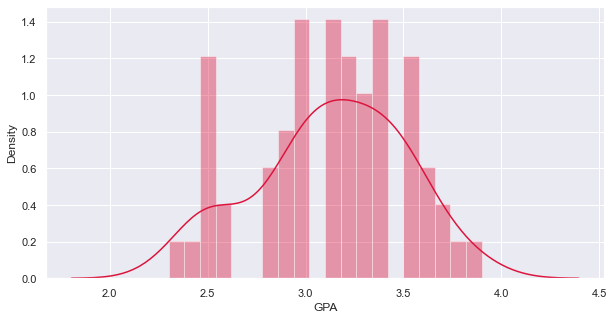

In [92]:
plt.figure(figsize=(10,5))
sns.distplot(CMSU_Data["GPA"], bins= 20, hist=True, kde=True,color='crimson');

Text(0, 0.5, 'GPA')

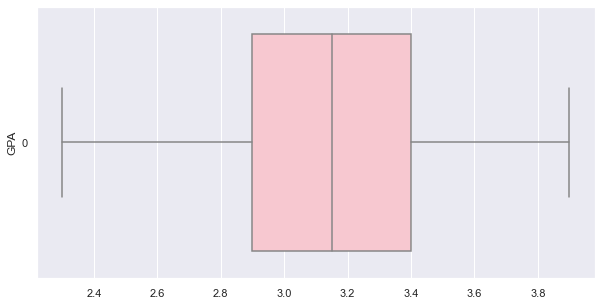

In [93]:
plt.figure(figsize= (10,5))
sns.set(color_codes=True)

sns.boxplot(data = CMSU_Data["GPA"],color = "pink",orient='h');
plt.ylabel('GPA')

In [94]:
#Shapiro test is used to determine whether or not a sample is a normal distribution.
t, p_value  = shapiro(CMSU_Data["GPA"]) 
t, p_value

(0.9685361981391907, 0.11204058676958084)

### Shapiro-Wilk Test of Normality for GPA 
- Test stat: 0.969 
- P value: 0.112     
  Since, P value > α (0.05), we fail to reject the Null hypothesis. 
 ### Hence, GPA is Normally distributed.  

## 2) Salary

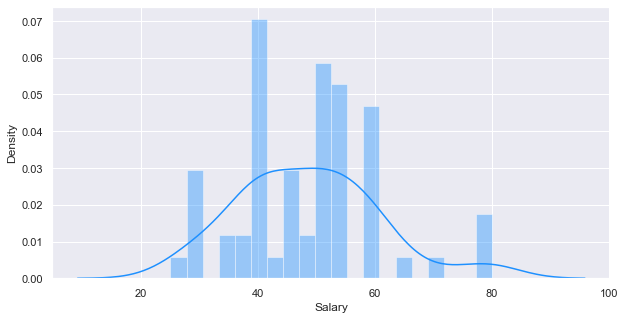

In [95]:
plt.figure(figsize=(10,5))
sns.distplot(CMSU_Data["Salary"], bins= 20, hist=True, kde=True,color='dodgerblue');

Text(0, 0.5, 'Salary')

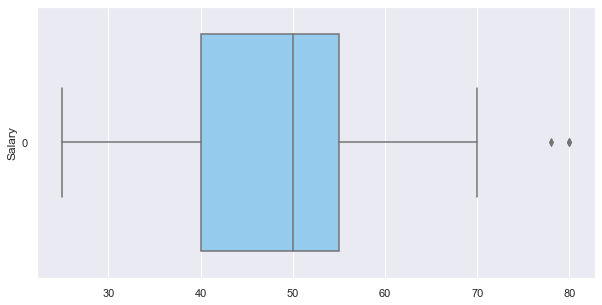

In [96]:
plt.figure(figsize= (10,5))
sns.set(color_codes=True)

sns.boxplot(data = CMSU_Data["Salary"],color = "lightskyblue",orient='h');
plt.ylabel('Salary')

In [97]:
#Shapiro test is used to determine whether or not a sample is a normal distribution.
t, p_value  = shapiro(CMSU_Data["Salary"]) 
t, p_value

(0.9565856456756592, 0.028000956401228905)

### Shapiro-Wilk Test of Normality for Salary 
- Test stat: 0.957 
- P value: 0.028  
  Since, P value < α (0.05), we reject the Null hypothesis. 
 ### Hence, Salary is NOT Normally distributed.

## 3) Spending

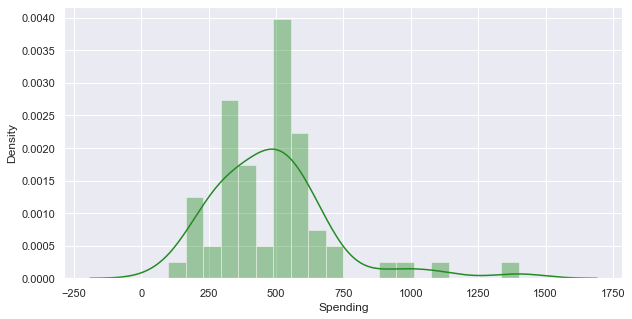

In [98]:
plt.figure(figsize=(10,5))
sns.distplot(CMSU_Data["Spending"], bins= 20, hist=True, kde=True,color='forestgreen');

Text(0, 0.5, 'Spending')

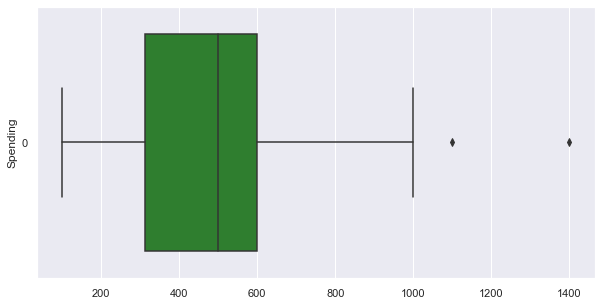

In [99]:
plt.figure(figsize= (10,5))
sns.set(color_codes=True)

sns.boxplot(data = CMSU_Data["Spending"],color = "forestgreen",orient='h');
plt.ylabel('Spending')

In [100]:
#Shapiro test is used to determine whether or not a sample is a normal distribution.
t, p_value  = shapiro(CMSU_Data["Spending"]) 
t, p_value

(0.8777452111244202, 1.6854661225806922e-05)

### Shapiro-Wilk Test of Normality for Spending 
- Test stat: 0.878  
- P value:  1.68-05 
  Since, P value < α (0.05), we reject the Null hypothesis. 
 ### Hence, Spending is NOT Normally distributed.

## 4) Text Messages

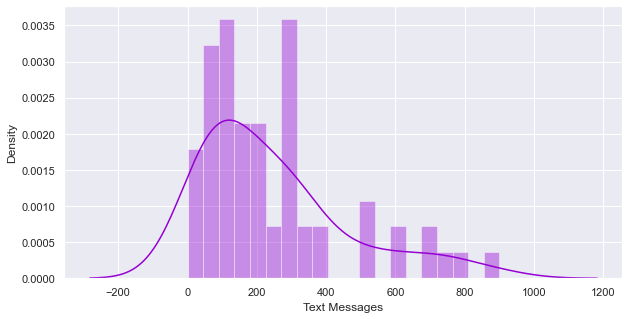

In [101]:
plt.figure(figsize=(10,5))
sns.distplot(CMSU_Data["Text Messages"], bins= 20, hist=True, kde=True,color='darkviolet');

Text(0, 0.5, 'Text Messages')

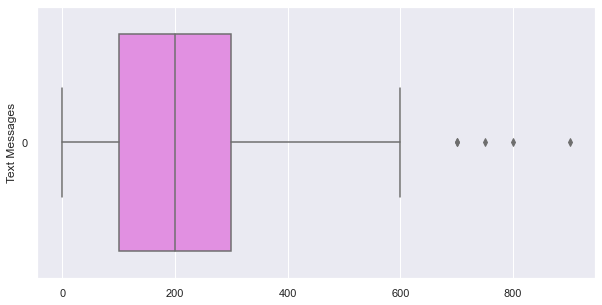

In [102]:
plt.figure(figsize= (10,5))
sns.set(color_codes=True)

sns.boxplot(data = CMSU_Data["Text Messages"],color = "violet",orient='h');
plt.ylabel('Text Messages')

In [103]:
#Shapiro test is used to determine whether or not a sample is a normal distribution.
t, p_value  = shapiro(CMSU_Data["Text Messages"]) 
t, p_value

(0.8594191074371338, 4.324040673964191e-06)

### Shapiro-Wilk Test of Normality for Text Messages
- Test stat: 0.859 
- P value:  4.324-06 
  Since, P value < α (0.05), we reject the Null hypothesis. 
 ### Hence, Text Messages is NOT Normally distributed.

## Problem Statement 3:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [104]:
Shingles_Data = pd.read_csv('A+&+B+shingles.csv')

### Exploratory Data Analysis: -

In [105]:
Shingles_Data.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


### Descriptive Data Analysis: -

In [106]:
Shingles_Data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.



#### Ho : Mean moisture content <= 0.35 pound per 100 sq ft


#### Ha : Mean moisture content > 0.35 pound per 100 sq ft 

#### α = 0.05

## For Shingles A 

In [107]:
t_statistics, p_value = ttest_1samp(Shingles_Data['A'],0.35)
t_statistics, p_value/2

(-1.4735046253382782, 0.07477633144907513)

One sample t test 
- t statistic: -1.473505
- P value: 0.07477633  
  Since, P value > α (0.05), we fail reject the Null hypothesis. 

### Conclusion
Hence, at 95% confidence level, there is sufficient evidence to prove that mean moisture content in A shingles is less than or equal to 0.35 pound per 100 square feet. 

## For Shingles B 

In [108]:
t_statistics, p_value = ttest_1samp(Shingles_Data['B'],0.35, nan_policy='omit')
t_statistics, p_value/2

(-3.1003313069986995, 0.0020904774003191826)

One sample t test 
- t statistic: -3.10033
- P value: 0.002090  
  Since, P value < α (0.05), we reject the Null hypothesis. 

### Conclusion
Hence, at 95% confidence level, there is sufficient evidence to prove that mean moisture content in B shingles is more than 0.35 pound per 100 square feet.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### H0 : μ(A)= μ(B) 

#### Ha : μ(A)!= μ(B) 

#### α = 0.05

In [109]:
t_statistic,p_value = ttest_ind(Shingles_Data['A'],Shingles_Data['B'],equal_var=True ,nan_policy='omit')
t_statistic,p_value

(1.2896282719661123, 0.2017496571835306)

- t statistic: (1.2896282
- P value: 0.20174965 
  Since, P value > α (0.05), we fail reject the Null hypothesis. 

### Conclusion
Hence, at 95% confidence level, there is sufficient evidence to prove that mean moisture content in A is equal to mean moisture content in B.

Assumptions needed to check before the test for equality of means is performed:
- The data values are continuous.
- The data values are independent.
- Measurement values for one observation do not affect measurement values of other observation.
- The data must be reasonably random.
- The data in each group is obtained via a random sample from the population.
- The data in each group is normally distributed. 
- The variances for the two independent groups are equal. 

# Thank you